In [1]:
!pip install pyod

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pyod
from pyod.models.auto_encoder import AutoEncoder

In [3]:
dados = sns.load_dataset('tips')
dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
dados.shape

(244, 7)

In [5]:
dados.isna().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


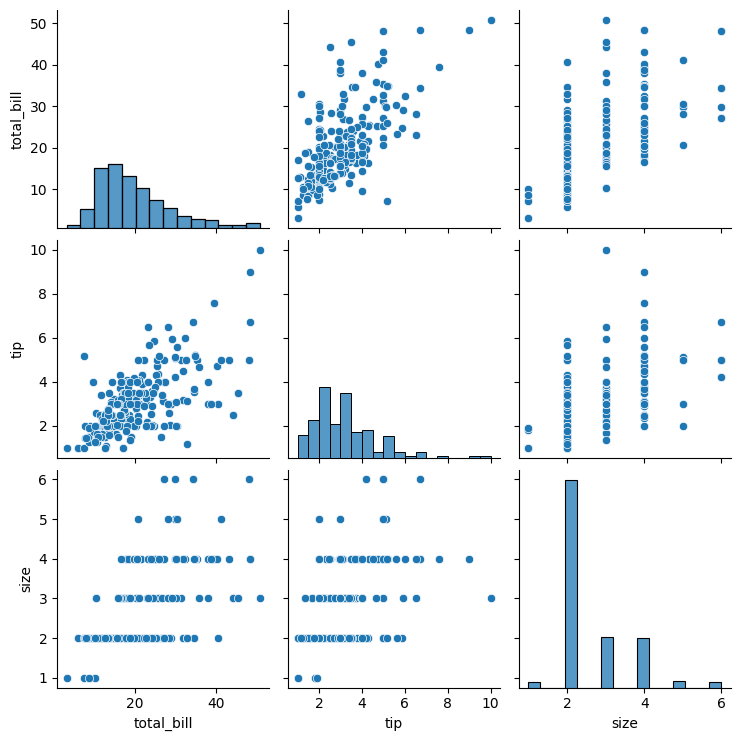

In [6]:
sns.pairplot(dados)

In [7]:
dados = dados.select_dtypes(include='number')

dados_treino = dados.sample(n = int(0.8*len(dados)))
dados_teste = dados.sample(n = int(0.2*len(dados)))

print(dados_treino.shape)
print(dados_teste.shape)

(195, 3)
(48, 3)


In [8]:
scaler = StandardScaler()

# Normalização
dados_treino_std = scaler.fit_transform(dados_treino)
dados_teste_std = scaler.fit_transform(dados_teste)

print(dados_treino_std.shape)
print(dados_teste_std.shape)

(195, 3)
(48, 3)


In [9]:
modelo_ae = AutoEncoder(hidden_neuron_list=[8, 4, 2, 4, 8], batch_size=32, epoch_num=50)
modelo_ae.fit(dados_treino_std)

Training: 100%|██████████| 50/50 [00:05<00:00,  8.90it/s]


In [10]:
dados_treino['anomalia'] =  modelo_ae.predict(dados_treino_std)
dados_treino['score'] =  modelo_ae.decision_function(dados_treino_std)

In [11]:
dados_treino.head()

,total_bill,tip,size,anomalia,score
71,17.07,3.00,3,0,0.588560
240,27.18,2.00,2,0,1.246920
87,18.28,4.00,2,0,0.891334
235,10.07,1.25,2,0,1.511407
82,10.07,1.83,1,0,1.871642


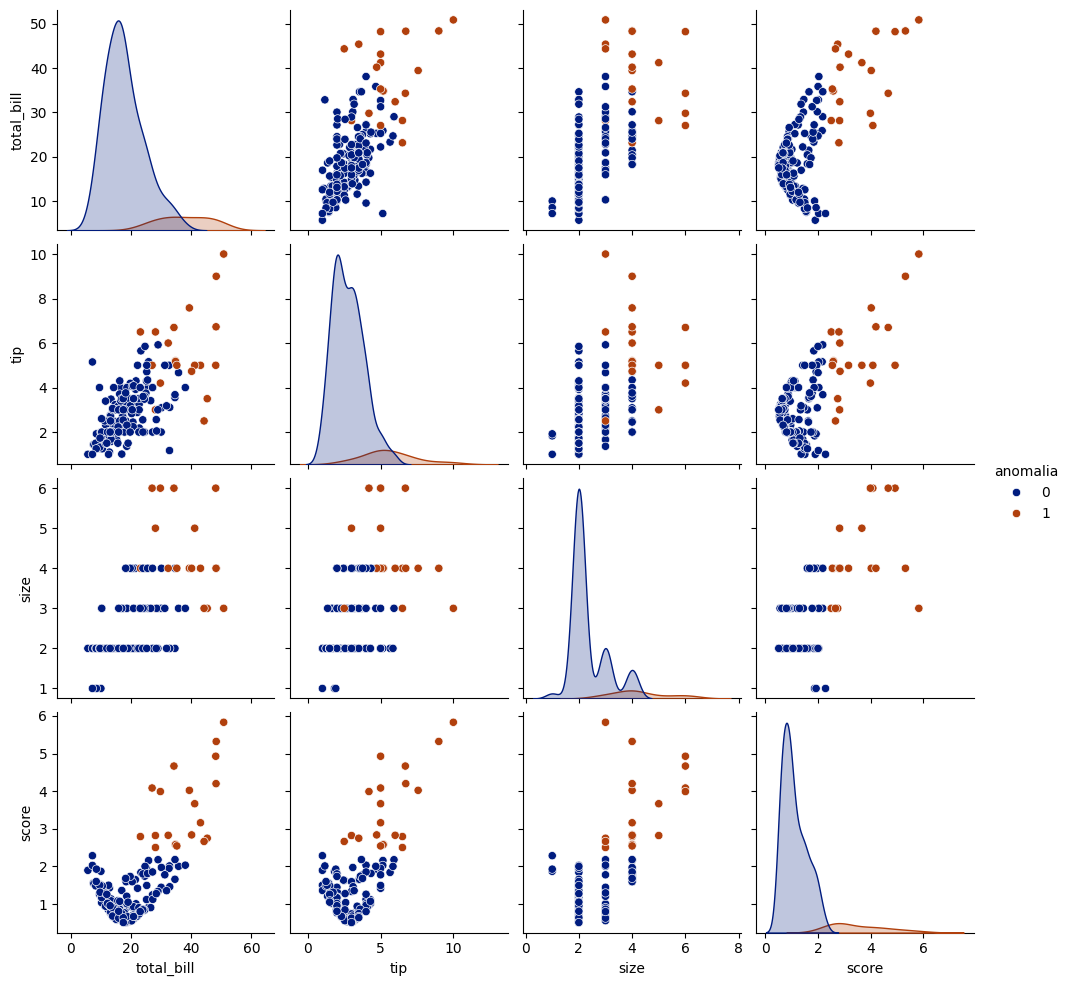

In [12]:
sns.pairplot(dados_treino, hue='anomalia', palette='dark')

<Axes: xlabel='score'>

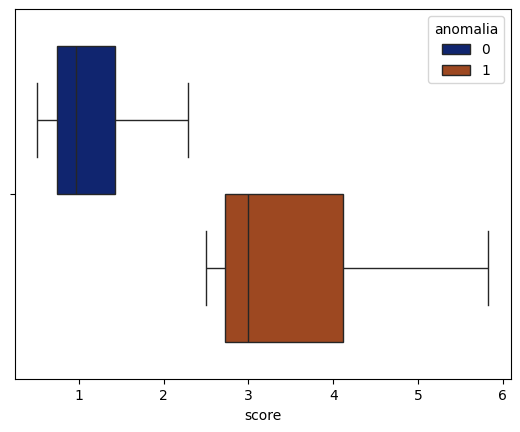

In [13]:
sns.boxplot(dados_treino, x='score', hue='anomalia', palette='dark')

In [14]:
modelo_ae.fit(dados_teste_std)

Training: 100%|██████████| 50/50 [00:00<00:00, 73.07it/s]


In [15]:
dados_teste['anomalia'] =  modelo_ae.predict(dados_teste_std)
dados_teste['score'] =  modelo_ae.decision_function(dados_teste_std)

In [16]:
dados_teste.head()

,total_bill,tip,size,anomalia,score
28,21.70,4.30,2,0,1.279298
211,25.89,5.16,4,0,2.860674
205,16.47,3.23,3,0,0.824824
200,18.71,4.00,3,0,1.144865
201,12.74,2.01,2,0,1.187478


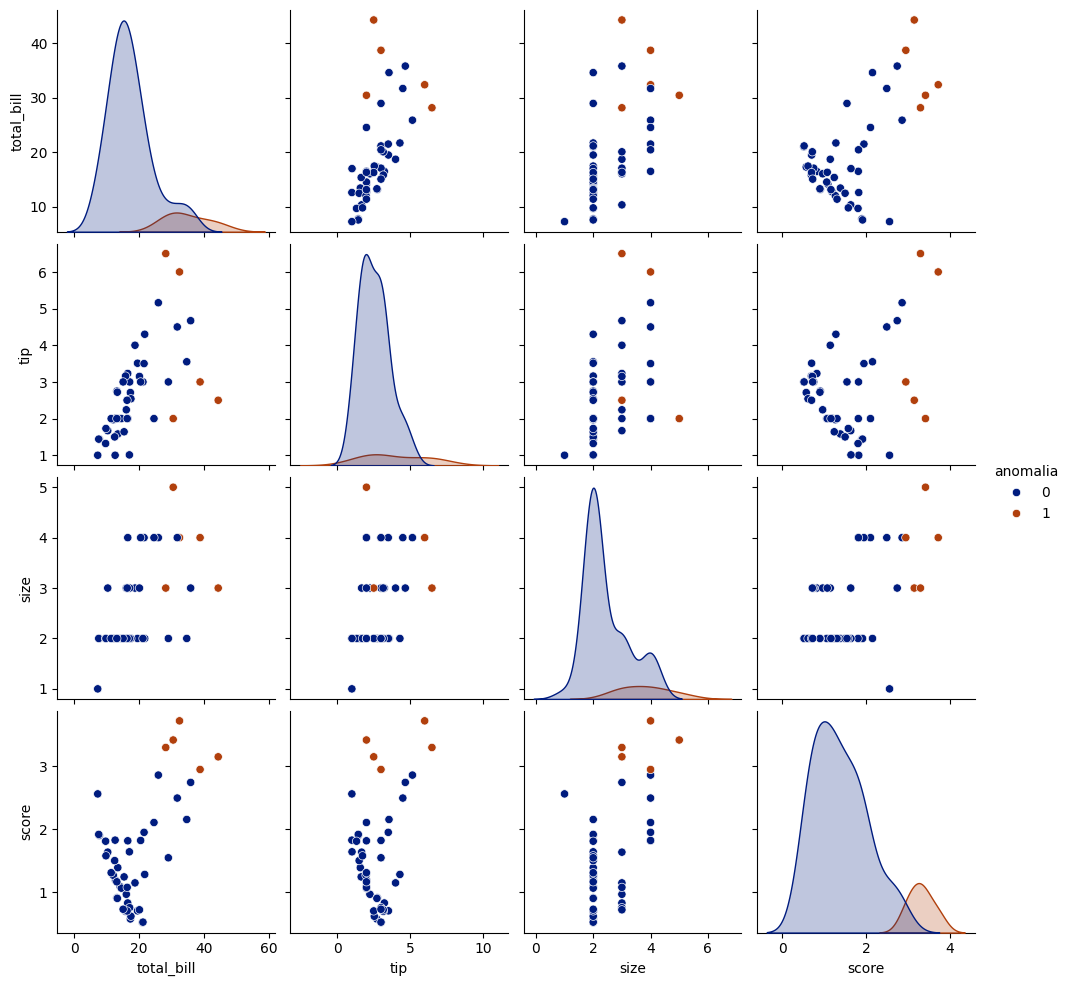

In [17]:
sns.pairplot(dados_teste, hue='anomalia', palette='dark')

<Axes: xlabel='score'>

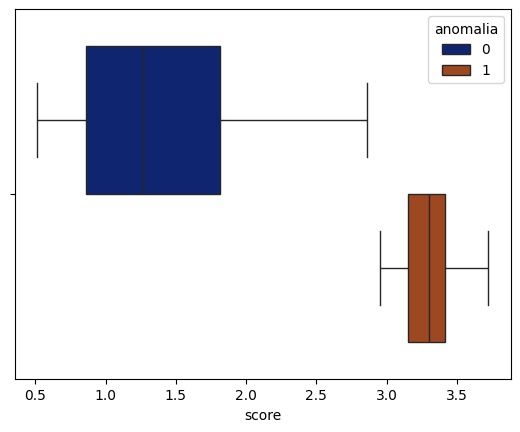

In [18]:
sns.boxplot(dados_teste, x='score', hue='anomalia', palette='dark')